Ok, let's:
- use this `Experiment` class for a few attempts
- Try both MP and PP problems
- gauge if there is any value in using notebooks for that
- make a clean lib to run sets of experiments
- look into how I can try and run an inference model right now on the robot
- document a few things
- start the blog
- make the blog immitate a bit the current fae blog?

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
from fae import dataset_loader
from fae.training_utils import Experiment

import numpy as np
import tensorflow as tf

import keras

from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.regularizers import l2
from keras.optimizers import Adam, SGD
from keras import backend as K

Using TensorFlow backend.


In [5]:
def make_model(dropout=0.1, 
               core_size=128, 
               num_layers=4, 
               activation='sigmoid',
               input_size=14,
               output_size=4):
    model = Sequential()
    for k in range(num_layers):
        if k==0:
            model.add(Dense(core_size, 
                            activation=activation, 
                            input_shape=(input_size,)))
        else:
            model.add(Dense(core_size, 
                            activation=activation))
        if dropout>0:
            model.add(Dropout(dropout))
    model.add(Dense(output_size, activation='linear'))
    return model

In [9]:
mp_model = make_model()

In [10]:
pp_model = make_model(input_size=11, output_size=7)

In [11]:
e_pp=Experiment(model=pp_model, optimizer=Adam(lr=0.004, amsgrad=True), 
             fit_params = { 'batch_size':10000,
                            'epochs':500,
                            'verbose':0,
                            'shuffle':True,
                            'validation_split':0.1},
            compile_params={'loss'    :'mean_squared_error',
                            'metrics' :['mean_squared_error']},
            data_loader = 'fae.dataset_loader.load_dataset("../../..//datasets/real/2019-10-18/raw/")[:2]',
            label = "PP s128 n4 d0.1, sig")

W1023 20:12:09.969022 139878058265600 deprecation_wrapper.py:119] From /home/yves/.local/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:174: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session instead.



In [13]:
e_mp=Experiment(model=mp_model, optimizer=Adam(lr=0.004, amsgrad=True), 
             fit_params = { 'batch_size':10000,
                            'epochs':500,
                            'verbose':0,
                            'shuffle':True,
                            'validation_split':0.1},
            compile_params={'loss'    :'mean_squared_error',
                            'metrics' :['mean_squared_error']},
            data_loader = 'fae.dataset_loader.load_dataset("../../../datasets/real/2019-10-18/raw/")[2:4]',
            label = "MP s128 n4 d0.1, sig")

In [14]:
e_mp.run(display=10)

W1023 20:12:18.049493 139878058265600 deprecation_wrapper.py:119] From /home/yves/.local/lib/python3.6/site-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



Epoch: 10/500 ...  - loss: 0.1610 - mean_squared_error: 0.1610 - val_loss: 0.1563 - val_mean_squared_error: 0.1563
Epoch: 20/500 ...  - loss: 0.0923 - mean_squared_error: 0.0923 - val_loss: 0.0331 - val_mean_squared_error: 0.0331
Epoch: 30/500 ...  - loss: 0.0620 - mean_squared_error: 0.0620 - val_loss: 0.0387 - val_mean_squared_error: 0.0387
Epoch: 40/500 ...  - loss: 0.0481 - mean_squared_error: 0.0481 - val_loss: 0.0173 - val_mean_squared_error: 0.0173
Epoch: 50/500 ...  - loss: 0.0415 - mean_squared_error: 0.0415 - val_loss: 0.0223 - val_mean_squared_error: 0.0223
Epoch: 60/500 ...  - loss: 0.0368 - mean_squared_error: 0.0368 - val_loss: 0.0197 - val_mean_squared_error: 0.0197
Epoch: 70/500 ...  - loss: 0.0335 - mean_squared_error: 0.0335 - val_loss: 0.0189 - val_mean_squared_error: 0.0189
Epoch: 80/500 ...  - loss: 0.0306 - mean_squared_error: 0.0306 - val_loss: 0.0203 - val_mean_squared_error: 0.0203
Epoch: 90/500 ...  - loss: 0.0278 - mean_squared_error: 0.0278 - val_loss: 0.019

In [15]:
e_pp.run(display=10)

Epoch: 10/500 ...  - loss: 0.1208 - mean_squared_error: 0.1208 - val_loss: 0.0791 - val_mean_squared_error: 0.0791
Epoch: 20/500 ...  - loss: 0.0822 - mean_squared_error: 0.0822 - val_loss: 0.0846 - val_mean_squared_error: 0.0846
Epoch: 30/500 ...  - loss: 0.0619 - mean_squared_error: 0.0619 - val_loss: 0.0443 - val_mean_squared_error: 0.0443
Epoch: 40/500 ...  - loss: 0.0513 - mean_squared_error: 0.0513 - val_loss: 0.0567 - val_mean_squared_error: 0.0567
Epoch: 50/500 ...  - loss: 0.0455 - mean_squared_error: 0.0455 - val_loss: 0.0441 - val_mean_squared_error: 0.0441
Epoch: 60/500 ...  - loss: 0.0409 - mean_squared_error: 0.0409 - val_loss: 0.0492 - val_mean_squared_error: 0.0492
Epoch: 70/500 ...  - loss: 0.0376 - mean_squared_error: 0.0376 - val_loss: 0.0445 - val_mean_squared_error: 0.0445
Epoch: 80/500 ...  - loss: 0.0349 - mean_squared_error: 0.0349 - val_loss: 0.0470 - val_mean_squared_error: 0.0470
Epoch: 90/500 ...  - loss: 0.0330 - mean_squared_error: 0.0330 - val_loss: 0.045

Trying to build some tools to easily visualize results of experiments

In [6]:
import os, pickle
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as mticker

In [7]:
%matplotlib inline
plt.rcParams['figure.figsize'] = [10, 4]

In [8]:
expdir = "experiments/"
expfns = [expdir+s for s in sorted(os.listdir(expdir))]

In [40]:
series = list()
for fn in expfns[-9:]:
    info=pickle.load(open(fn, "rb"))
    print(fn, "|", info.get("label", "---"))
    series.append((info.get("label","-"), [x['val_loss'] for x in info["exp_log"][50:]]))


experiments/exp_20191023_20-29-58.pickle | MP s64 n6 d0.1, sigmoid
experiments/exp_20191023_20-30-21.pickle | MP s64 n4 d0.4, relu
experiments/exp_20191023_20-30-32.pickle | MP s64 n1 d0, relu
experiments/exp_20191023_20-31-14.pickle | MP s16 n30 d0.1, relu
experiments/exp_20191023_20-31-57.pickle | MP s16 n30 d0.2, sigmoid
experiments/exp_20191023_20-32-15.pickle | MP s64 n2 d0.2, sigmoid
experiments/exp_20191023_20-33-12.pickle | MP s64 n12 d0.1, relu
experiments/exp_20191023_20-34-12.pickle | MP s64 n12 d0.4, sigmoid
experiments/exp_20191023_20-36-24.pickle | MP s64 n30 d0.2, sigmoid


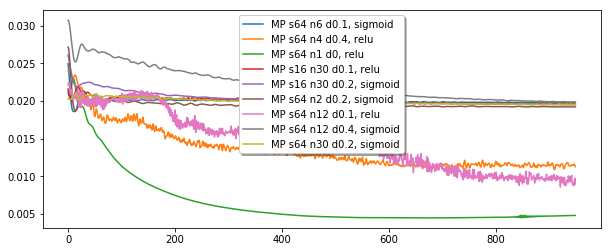

In [41]:
fig, ax = plt.subplots()
for s in series:
    ax.plot(s[1], label=s[0])
legend = ax.legend(loc='upper center', shadow=True)

Hmmm, needs a bit of work to make an easy and clean function...

Now let's try to generate a bunch of models and experiments:

In [46]:
import random

dropouts = [0, 0.1, 0.2, 0.4]
core_sizes = [16, 32, 64, 128]
#num_layers = [1, 2, 4, 6, 12, 30]
num_layers = [1]
activations = ["sigmoid", "relu"]

params = set()
for k in range(10):
    params.add((
        random.choice(dropouts),
        random.choice(core_sizes),
        random.choice(num_layers),
        random.choice(activations),
    ))
params

{(0, 32, 1, 'sigmoid'),
 (0, 64, 1, 'sigmoid'),
 (0.1, 128, 1, 'sigmoid'),
 (0.2, 16, 1, 'relu'),
 (0.2, 32, 1, 'relu'),
 (0.2, 64, 1, 'sigmoid'),
 (0.2, 128, 1, 'relu'),
 (0.4, 16, 1, 'sigmoid'),
 (0.4, 128, 1, 'relu')}

In [47]:
experiments = list()

for p in params:
    mp_model = make_model(p[0], p[1],p[2], p[3])
    label = f"MP s{p[1]} n{p[2]} d{p[0]}, {p[3]}"
    e= Experiment(model=mp_model, optimizer=Adam(lr=0.004, amsgrad=True), 
             fit_params = { 'batch_size':10000,
                            'epochs':1000,
                            'verbose':0,
                            'shuffle':True,
                            'validation_split':0.1},
            compile_params={'loss'    :'mean_squared_error',
                            'metrics' :['mean_squared_error']},
            data_loader = 'fae.dataset_loader.load_dataset("../../..//datasets/real/2019-10-18/raw/")[2:4]',
            label = label)
    experiments.append(e)

In [48]:
for e in experiments:
    print("-"*20)
    print(e.label)
    e.run(display=100)

--------------------
MP s16 n1 d0.4, sigmoid
Epoch: 100/1000 ...  - loss: 0.0996 - mean_squared_error: 0.0996 - val_loss: 0.0351 - val_mean_squared_error: 0.0351
Epoch: 200/1000 ...  - loss: 0.0491 - mean_squared_error: 0.0491 - val_loss: 0.0262 - val_mean_squared_error: 0.0262
Epoch: 300/1000 ...  - loss: 0.0322 - mean_squared_error: 0.0322 - val_loss: 0.0221 - val_mean_squared_error: 0.0221
Epoch: 400/1000 ...  - loss: 0.0246 - mean_squared_error: 0.0246 - val_loss: 0.0199 - val_mean_squared_error: 0.0199
Epoch: 500/1000 ...  - loss: 0.0209 - mean_squared_error: 0.0209 - val_loss: 0.0189 - val_mean_squared_error: 0.0189
Epoch: 600/1000 ...  - loss: 0.0184 - mean_squared_error: 0.0184 - val_loss: 0.0183 - val_mean_squared_error: 0.0183
Epoch: 700/1000 ...  - loss: 0.0169 - mean_squared_error: 0.0169 - val_loss: 0.0180 - val_mean_squared_error: 0.0180
Epoch: 800/1000 ...  - loss: 0.0161 - mean_squared_error: 0.0161 - val_loss: 0.0178 - val_mean_squared_error: 0.0178
Epoch: 900/1000 ...

Epoch: 600/1000 ...  - loss: 0.0075 - mean_squared_error: 0.0075 - val_loss: 0.0068 - val_mean_squared_error: 0.0068
Epoch: 700/1000 ...  - loss: 0.0069 - mean_squared_error: 0.0069 - val_loss: 0.0061 - val_mean_squared_error: 0.0061
Epoch: 800/1000 ...  - loss: 0.0064 - mean_squared_error: 0.0064 - val_loss: 0.0055 - val_mean_squared_error: 0.0055
Epoch: 900/1000 ...  - loss: 0.0062 - mean_squared_error: 0.0062 - val_loss: 0.0052 - val_mean_squared_error: 0.0052
--------------------
MP s16 n1 d0.2, relu
Epoch: 100/1000 ...  - loss: 0.0258 - mean_squared_error: 0.0258 - val_loss: 0.0255 - val_mean_squared_error: 0.0255
Epoch: 200/1000 ...  - loss: 0.0177 - mean_squared_error: 0.0177 - val_loss: 0.0162 - val_mean_squared_error: 0.0162
Epoch: 300/1000 ...  - loss: 0.0137 - mean_squared_error: 0.0137 - val_loss: 0.0122 - val_mean_squared_error: 0.0122
Epoch: 400/1000 ...  - loss: 0.0117 - mean_squared_error: 0.0117 - val_loss: 0.0109 - val_mean_squared_error: 0.0109
Epoch: 500/1000 ...  -

experiments/exp_20191023_20-45-37.pickle | MP s16 n1 d0.4, sigmoid
experiments/exp_20191023_20-45-57.pickle | MP s128 n1 d0.1, sigmoid
experiments/exp_20191023_20-46-18.pickle | MP s128 n1 d0.2, relu
experiments/exp_20191023_20-46-32.pickle | MP s64 n1 d0, sigmoid
experiments/exp_20191023_20-46-52.pickle | MP s128 n1 d0.4, relu
experiments/exp_20191023_20-47-06.pickle | MP s32 n1 d0, sigmoid
experiments/exp_20191023_20-47-24.pickle | MP s64 n1 d0.2, sigmoid
experiments/exp_20191023_20-47-40.pickle | MP s32 n1 d0.2, relu
experiments/exp_20191023_20-47-55.pickle | MP s16 n1 d0.2, relu


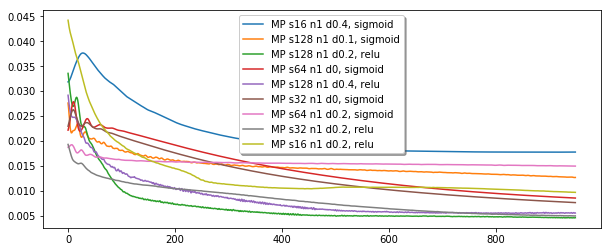

In [51]:
expdir = "experiments/"
expfns = [expdir+s for s in sorted(os.listdir(expdir))]
series = list()
for fn in expfns[-9:]:
    info=pickle.load(open(fn, "rb"))
    print(fn, "|", info.get("label", "---"))
    series.append((info.get("label","-"), [x['val_loss'] for x in info["exp_log"][50:]]))
fig, ax = plt.subplots()
for s in series:
    ax.plot(s[1], label=s[0])
legend = ax.legend(loc='upper center', shadow=True)    

In [52]:
dropouts = [0, 0.1, 0.2, 0.4]
core_sizes = [16, 32, 64, 128]
#num_layers = [1, 2, 4, 6, 12, 30]
num_layers = [1]
#activations = ["sigmoid", "relu"]
activations = ["relu"]

params = set()
for k in range(10):
    params.add((
        random.choice(dropouts),
        random.choice(core_sizes),
        random.choice(num_layers),
        random.choice(activations),
    ))
params

{(0, 16, 1, 'relu'),
 (0, 128, 1, 'relu'),
 (0.1, 16, 1, 'relu'),
 (0.1, 32, 1, 'relu'),
 (0.1, 64, 1, 'relu'),
 (0.2, 64, 1, 'relu'),
 (0.4, 64, 1, 'relu'),
 (0.4, 128, 1, 'relu')}

In [53]:
experiments = list()

for p in params:
    mp_model = make_model(p[0], p[1],p[2], p[3])
    label = f"MP s{p[1]} n{p[2]} d{p[0]}, {p[3]}"
    e= Experiment(model=mp_model, optimizer=Adam(lr=0.004, amsgrad=True), 
             fit_params = { 'batch_size':10000,
                            'epochs':1000,
                            'verbose':0,
                            'shuffle':True,
                            'validation_split':0.1},
            compile_params={'loss'    :'mean_squared_error',
                            'metrics' :['mean_squared_error']},
            data_loader = 'fae.dataset_loader.load_dataset("../../..//datasets/real/2019-10-18/raw/")[2:4]',
            label = label)
    experiments.append(e)

In [54]:
for e in experiments:
    print("-"*20)
    print(e.label)
    e.run(display=100)

--------------------
MP s64 n1 d0.1, relu
Epoch: 100/1000 ...  - loss: 0.0133 - mean_squared_error: 0.0133 - val_loss: 0.0197 - val_mean_squared_error: 0.0197
Epoch: 200/1000 ...  - loss: 0.0094 - mean_squared_error: 0.0094 - val_loss: 0.0127 - val_mean_squared_error: 0.0127
Epoch: 300/1000 ...  - loss: 0.0075 - mean_squared_error: 0.0075 - val_loss: 0.0093 - val_mean_squared_error: 0.0093
Epoch: 400/1000 ...  - loss: 0.0064 - mean_squared_error: 0.0064 - val_loss: 0.0075 - val_mean_squared_error: 0.0075
Epoch: 500/1000 ...  - loss: 0.0058 - mean_squared_error: 0.0058 - val_loss: 0.0063 - val_mean_squared_error: 0.0063
Epoch: 600/1000 ...  - loss: 0.0053 - mean_squared_error: 0.0053 - val_loss: 0.0056 - val_mean_squared_error: 0.0056
Epoch: 700/1000 ...  - loss: 0.0049 - mean_squared_error: 0.0049 - val_loss: 0.0052 - val_mean_squared_error: 0.0052
Epoch: 800/1000 ...  - loss: 0.0046 - mean_squared_error: 0.0046 - val_loss: 0.0050 - val_mean_squared_error: 0.0050
Epoch: 900/1000 ...  -

Epoch: 600/1000 ...  - loss: 0.0110 - mean_squared_error: 0.0110 - val_loss: 0.0135 - val_mean_squared_error: 0.0135
Epoch: 700/1000 ...  - loss: 0.0103 - mean_squared_error: 0.0103 - val_loss: 0.0135 - val_mean_squared_error: 0.0135
Epoch: 800/1000 ...  - loss: 0.0100 - mean_squared_error: 0.0100 - val_loss: 0.0137 - val_mean_squared_error: 0.0137
Epoch: 900/1000 ...  - loss: 0.0096 - mean_squared_error: 0.0096 - val_loss: 0.0140 - val_mean_squared_error: 0.0140


experiments/exp_20191023_20-52-01.pickle | MP s64 n1 d0.1, relu
experiments/exp_20191023_20-52-19.pickle | MP s64 n1 d0.2, relu
experiments/exp_20191023_20-52-35.pickle | MP s128 n1 d0, relu
experiments/exp_20191023_20-52-52.pickle | MP s32 n1 d0.1, relu
experiments/exp_20191023_20-53-10.pickle | MP s64 n1 d0.4, relu
experiments/exp_20191023_20-53-31.pickle | MP s128 n1 d0.4, relu
experiments/exp_20191023_20-53-46.pickle | MP s16 n1 d0, relu
experiments/exp_20191023_20-54-02.pickle | MP s16 n1 d0.1, relu


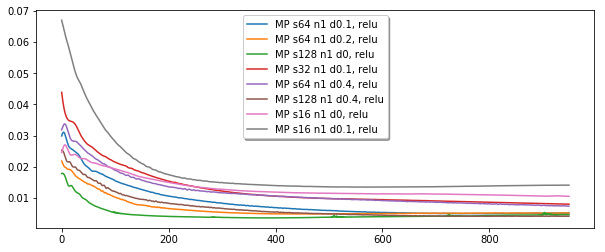

In [55]:
expdir = "experiments/"
expfns = [expdir+s for s in sorted(os.listdir(expdir))]
series = list()
for fn in expfns[-8:]:
    info=pickle.load(open(fn, "rb"))
    print(fn, "|", info.get("label", "---"))
    series.append((info.get("label","-"), [x['val_loss'] for x in info["exp_log"][50:]]))
fig, ax = plt.subplots()
for s in series:
    ax.plot(s[1], label=s[0])
legend = ax.legend(loc='upper center', shadow=True)    

In [59]:
import random

dropouts = [0, 0.1, 0.2, 0.4]
#core_sizes = [16, 32, 64, 128]
core_sizes = [128, 256, 512, 1024]
#num_layers = [1, 2, 4, 6, 12, 30]
num_layers = [1]
#activations = ["sigmoid", "relu"]
activations = ["relu"]

params = set()
for k in range(15):
    params.add((
        random.choice(dropouts),
        random.choice(core_sizes),
        random.choice(num_layers),
        random.choice(activations),
    ))
params

{(0, 128, 1, 'relu'),
 (0, 512, 1, 'relu'),
 (0, 1024, 1, 'relu'),
 (0.1, 512, 1, 'relu'),
 (0.2, 1024, 1, 'relu'),
 (0.4, 128, 1, 'relu'),
 (0.4, 256, 1, 'relu'),
 (0.4, 512, 1, 'relu'),
 (0.4, 1024, 1, 'relu')}

In [60]:
experiments = list()

for p in params:
    mp_model = make_model(p[0], p[1],p[2], p[3])
    label = f"MP s{p[1]} n{p[2]} d{p[0]}, {p[3]}"
    e= Experiment(model=mp_model, optimizer=Adam(lr=0.004, amsgrad=True), 
             fit_params = { 'batch_size':10000,
                            'epochs':1000,
                            'verbose':0,
                            'shuffle':True,
                            'validation_split':0.1},
            compile_params={'loss'    :'mean_squared_error',
                            'metrics' :['mean_squared_error']},
            data_loader = 'fae.dataset_loader.load_dataset("../../..//datasets/real/2019-10-18/raw/")[2:4]',
            label = label)
    experiments.append(e)
    
for e in experiments:
    print("-"*20)
    print(e.label)
    e.run(display=100)

--------------------
MP s1024 n1 d0.4, relu
Epoch: 100/1000 ...  - loss: 0.0094 - mean_squared_error: 0.0094 - val_loss: 0.0134 - val_mean_squared_error: 0.0134
Epoch: 200/1000 ...  - loss: 0.0058 - mean_squared_error: 0.0058 - val_loss: 0.0065 - val_mean_squared_error: 0.0065
Epoch: 300/1000 ...  - loss: 0.0047 - mean_squared_error: 0.0047 - val_loss: 0.0050 - val_mean_squared_error: 0.0050
Epoch: 400/1000 ...  - loss: 0.0041 - mean_squared_error: 0.0041 - val_loss: 0.0044 - val_mean_squared_error: 0.0044
Epoch: 500/1000 ...  - loss: 0.0037 - mean_squared_error: 0.0037 - val_loss: 0.0040 - val_mean_squared_error: 0.0040
Epoch: 600/1000 ...  - loss: 0.0034 - mean_squared_error: 0.0034 - val_loss: 0.0038 - val_mean_squared_error: 0.0038
Epoch: 700/1000 ...  - loss: 0.0032 - mean_squared_error: 0.0032 - val_loss: 0.0036 - val_mean_squared_error: 0.0036
Epoch: 800/1000 ...  - loss: 0.0030 - mean_squared_error: 0.0030 - val_loss: 0.0034 - val_mean_squared_error: 0.0034
Epoch: 900/1000 ... 

Epoch: 600/1000 ...  - loss: 0.0028 - mean_squared_error: 0.0028 - val_loss: 0.0036 - val_mean_squared_error: 0.0036
Epoch: 700/1000 ...  - loss: 0.0026 - mean_squared_error: 0.0026 - val_loss: 0.0035 - val_mean_squared_error: 0.0035
Epoch: 800/1000 ...  - loss: 0.0024 - mean_squared_error: 0.0024 - val_loss: 0.0034 - val_mean_squared_error: 0.0034
Epoch: 900/1000 ...  - loss: 0.0023 - mean_squared_error: 0.0023 - val_loss: 0.0034 - val_mean_squared_error: 0.0034
--------------------
MP s512 n1 d0.4, relu
Epoch: 100/1000 ...  - loss: 0.0093 - mean_squared_error: 0.0093 - val_loss: 0.0111 - val_mean_squared_error: 0.0111
Epoch: 200/1000 ...  - loss: 0.0061 - mean_squared_error: 0.0061 - val_loss: 0.0061 - val_mean_squared_error: 0.0061
Epoch: 300/1000 ...  - loss: 0.0051 - mean_squared_error: 0.0051 - val_loss: 0.0040 - val_mean_squared_error: 0.0040
Epoch: 400/1000 ...  - loss: 0.0045 - mean_squared_error: 0.0045 - val_loss: 0.0033 - val_mean_squared_error: 0.0033
Epoch: 500/1000 ...  

experiments/exp_20191023_20-59-02.pickle | MP s512 n1 d0, relu
experiments/exp_20191023_20-59-41.pickle | MP s1024 n1 d0, relu
experiments/exp_20191023_21-00-28.pickle | MP s512 n1 d0.1, relu
experiments/exp_20191023_21-00-46.pickle | MP s128 n1 d0, relu
experiments/exp_20191023_21-01-08.pickle | MP s128 n1 d0.4, relu
experiments/exp_20191023_21-01-38.pickle | MP s256 n1 d0.4, relu
experiments/exp_20191023_21-02-59.pickle | MP s1024 n1 d0.2, relu
experiments/exp_20191023_21-03-47.pickle | MP s512 n1 d0.4, relu


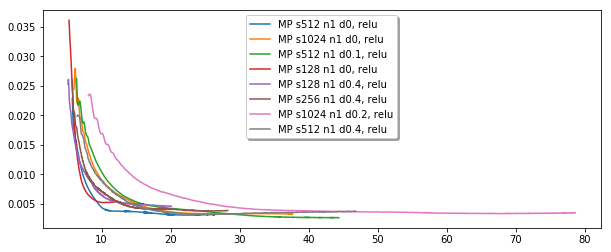

In [64]:
expdir = "experiments/"
expfns = [expdir+s for s in sorted(os.listdir(expdir))]
series = list()
for fn in expfns[-len(params):]:
    info=pickle.load(open(fn, "rb"))
    print(fn, "|", info.get("label", "---"))
    series.append((info.get("label","-"), [x['val_loss'] for x in info["exp_log"][50:]], [x['timestamp'] for x in info["exp_log"][50:]]))
fig, ax = plt.subplots()
for s in series:
    ax.plot(s[2], s[1], label=s[0])
legend = ax.legend(loc='upper center', shadow=True)    

At this point I made a change in the dataset loader so that it shuffles data **before** doing the validation split. Reduced a lot the gap between training and validation data. Not sure how beneficial this is actually.

In [10]:
params = set([(0, 128, 1, 'relu'),
 (0, 512, 1, 'relu'),
 (0, 1024, 1, 'relu'),
 (0.1, 512, 1, 'relu'),
 (0.2, 1024, 1, 'relu'),
 (0.4, 128, 1, 'relu'),
 (0.4, 256, 1, 'relu'),
 (0.4, 512, 1, 'relu'),
 (0.4, 1024, 1, 'relu')])

In [11]:
experiments = list()

for p in params:
    mp_model = make_model(p[0], p[1],p[2], p[3])
    label = f"MP s{p[1]} n{p[2]} d{p[0]}, {p[3]}"
    e= Experiment(model=mp_model, optimizer=Adam(lr=0.004, amsgrad=True), 
             fit_params = { 'batch_size':10000,
                            'epochs':1000,
                            'verbose':0,
                            'shuffle':True,
                            'validation_split':0.1},
            compile_params={'loss'    :'mean_squared_error',
                            'metrics' :['mean_squared_error']},
            data_loader = 'fae.dataset_loader.load_dataset("../../..//datasets/real/2019-10-18/raw/")[2:4]',
            label = label)
    experiments.append(e)
    
for e in experiments:
    print("-"*20)
    print(e.label)
    e.run(display=100)

W1023 21:12:55.600311 139838896696320 deprecation_wrapper.py:119] From /home/yves/.local/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W1023 21:12:55.615283 139838896696320 deprecation_wrapper.py:119] From /home/yves/.local/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W1023 21:12:55.616910 139838896696320 deprecation_wrapper.py:119] From /home/yves/.local/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W1023 21:12:55.673392 139838896696320 deprecation_wrapper.py:119] From /home/yves/.local/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:174: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session instead.

W102

--------------------
MP s512 n1 d0, relu
Epoch: 100/1000 ...  - loss: 0.0046 - mean_squared_error: 0.0046 - val_loss: 0.0045 - val_mean_squared_error: 0.0045
Epoch: 200/1000 ...  - loss: 0.0027 - mean_squared_error: 0.0027 - val_loss: 0.0027 - val_mean_squared_error: 0.0027
Epoch: 300/1000 ...  - loss: 0.0023 - mean_squared_error: 0.0023 - val_loss: 0.0023 - val_mean_squared_error: 0.0023
Epoch: 400/1000 ...  - loss: 0.0021 - mean_squared_error: 0.0021 - val_loss: 0.0021 - val_mean_squared_error: 0.0021
Epoch: 500/1000 ...  - loss: 0.0019 - mean_squared_error: 0.0019 - val_loss: 0.0019 - val_mean_squared_error: 0.0019
Epoch: 600/1000 ...  - loss: 0.0017 - mean_squared_error: 0.0017 - val_loss: 0.0017 - val_mean_squared_error: 0.0017
Epoch: 700/1000 ...  - loss: 0.0016 - mean_squared_error: 0.0016 - val_loss: 0.0015 - val_mean_squared_error: 0.0015
Epoch: 800/1000 ...  - loss: 0.0014 - mean_squared_error: 0.0014 - val_loss: 0.0014 - val_mean_squared_error: 0.0014
Epoch: 900/1000 ...  - 

Epoch: 600/1000 ...  - loss: 0.0044 - mean_squared_error: 0.0044 - val_loss: 0.0027 - val_mean_squared_error: 0.0027
Epoch: 700/1000 ...  - loss: 0.0041 - mean_squared_error: 0.0041 - val_loss: 0.0026 - val_mean_squared_error: 0.0026
Epoch: 800/1000 ...  - loss: 0.0039 - mean_squared_error: 0.0039 - val_loss: 0.0025 - val_mean_squared_error: 0.0025
Epoch: 900/1000 ...  - loss: 0.0037 - mean_squared_error: 0.0037 - val_loss: 0.0023 - val_mean_squared_error: 0.0023
--------------------
MP s1024 n1 d0.4, relu
Epoch: 100/1000 ...  - loss: 0.0093 - mean_squared_error: 0.0093 - val_loss: 0.0072 - val_mean_squared_error: 0.0072
Epoch: 200/1000 ...  - loss: 0.0059 - mean_squared_error: 0.0059 - val_loss: 0.0041 - val_mean_squared_error: 0.0041
Epoch: 300/1000 ...  - loss: 0.0047 - mean_squared_error: 0.0047 - val_loss: 0.0030 - val_mean_squared_error: 0.0030
Epoch: 400/1000 ...  - loss: 0.0041 - mean_squared_error: 0.0041 - val_loss: 0.0026 - val_mean_squared_error: 0.0026
Epoch: 500/1000 ... 

experiments/exp_20191023_21-13-15.pickle | MP s512 n1 d0, relu
experiments/exp_20191023_21-13-51.pickle | MP s512 n1 d0.1, relu
experiments/exp_20191023_21-14-20.pickle | MP s1024 n1 d0, relu
experiments/exp_20191023_21-15-29.pickle | MP s1024 n1 d0.2, relu
experiments/exp_20191023_21-15-35.pickle | MP s128 n1 d0, relu
experiments/exp_20191023_21-15-46.pickle | MP s128 n1 d0.4, relu
experiments/exp_20191023_21-16-05.pickle | MP s256 n1 d0.4, relu
experiments/exp_20191023_21-16-40.pickle | MP s512 n1 d0.4, relu
experiments/exp_20191023_21-17-49.pickle | MP s1024 n1 d0.4, relu


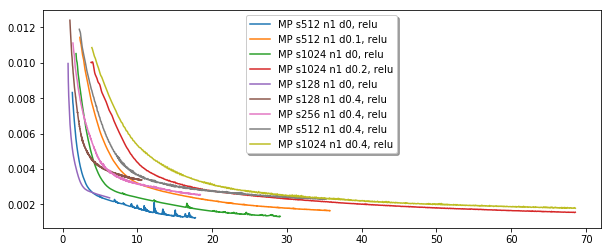

In [12]:
expdir = "experiments/"
expfns = [expdir+s for s in sorted(os.listdir(expdir))]
series = list()
for fn in expfns[-len(params):]:
    info=pickle.load(open(fn, "rb"))
    print(fn, "|", info.get("label", "---"))
    series.append((info.get("label","-"), [x['val_loss'] for x in info["exp_log"][50:]], [x['timestamp'] for x in info["exp_log"][50:]]))
fig, ax = plt.subplots()
for s in series:
    ax.plot(s[2], s[1], label=s[0])
legend = ax.legend(loc='upper center', shadow=True)    

{(0, 512, 1, 'relu'), (0, 1024, 1, 'relu'), (0, 512, 3, 'relu'), (0, 1024, 3, 'relu'), (0, 1024, 2, 'relu')}
--------------------
MP s512 n1 d0, relu
Epoch: 100/1000 ...  - loss: 0.0055 - mean_squared_error: 0.0055 - val_loss: 0.0054 - val_mean_squared_error: 0.0054
Epoch: 200/1000 ...  - loss: 0.0029 - mean_squared_error: 0.0029 - val_loss: 0.0028 - val_mean_squared_error: 0.0028
Epoch: 300/1000 ...  - loss: 0.0026 - mean_squared_error: 0.0026 - val_loss: 0.0026 - val_mean_squared_error: 0.0026
Epoch: 400/1000 ...  - loss: 0.0025 - mean_squared_error: 0.0025 - val_loss: 0.0024 - val_mean_squared_error: 0.0024
Epoch: 500/1000 ...  - loss: 0.0023 - mean_squared_error: 0.0023 - val_loss: 0.0023 - val_mean_squared_error: 0.0023
Epoch: 600/1000 ...  - loss: 0.0022 - mean_squared_error: 0.0022 - val_loss: 0.0022 - val_mean_squared_error: 0.0022
Epoch: 700/1000 ...  - loss: 0.0021 - mean_squared_error: 0.0021 - val_loss: 0.0020 - val_mean_squared_error: 0.0020
Epoch: 800/1000 ...  - loss: 0.

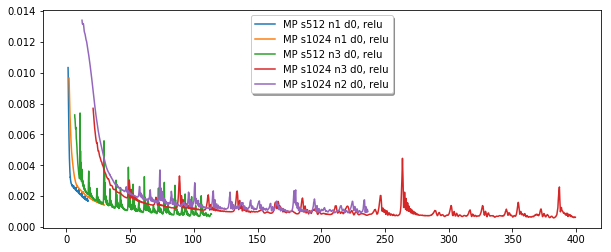

In [13]:
import random

dropouts = [0]
core_sizes = [512, 1024]
num_layers = [1, 2, 3]
activations = ["relu"]

params = set()
for k in range(15):
    params.add((
        random.choice(dropouts),
        random.choice(core_sizes),
        random.choice(num_layers),
        random.choice(activations),
    ))
print(params)

experiments = list()

for p in params:
    mp_model = make_model(p[0], p[1],p[2], p[3])
    label = f"MP s{p[1]} n{p[2]} d{p[0]}, {p[3]}"
    e= Experiment(model=mp_model, optimizer=Adam(lr=0.004, amsgrad=True), 
             fit_params = { 'batch_size':10000,
                            'epochs':1000,
                            'verbose':0,
                            'shuffle':True,
                            'validation_split':0.1},
            compile_params={'loss'    :'mean_squared_error',
                            'metrics' :['mean_squared_error']},
            data_loader = 'fae.dataset_loader.load_dataset("../../..//datasets/real/2019-10-18/raw/")[2:4]',
            label = label)
    experiments.append(e)
    
for e in experiments:
    print("-"*20)
    print(e.label)
    e.run(display=100)
    
expdir = "experiments/"
expfns = [expdir+s for s in sorted(os.listdir(expdir))]
series = list()
for fn in expfns[-len(params):]:
    info=pickle.load(open(fn, "rb"))
    print(fn, "|", info.get("label", "---"))
    series.append((info.get("label","-"), [x['val_loss'] for x in info["exp_log"][50:]], [x['timestamp'] for x in info["exp_log"][50:]]))
fig, ax = plt.subplots()
for s in series:
    ax.plot(s[2], s[1], label=s[0])
legend = ax.legend(loc='upper center', shadow=True)   

Now trying to restore actual commands from model inferences

In [19]:
info=pickle.load(open("experiments/exp_20191023_21-22-29.pickle", "rb"))
e=Experiment.from_file("experiments/exp_20191023_21-22-29.pickle")

In [22]:
e.run(display=10, save=False)

Epoch: 10/1000 ...  - loss: 0.0175 - mean_squared_error: 0.0175 - val_loss: 0.0265 - val_mean_squared_error: 0.0265
Epoch: 20/1000 ...  - loss: 0.0155 - mean_squared_error: 0.0155 - val_loss: 0.0151 - val_mean_squared_error: 0.0151
Epoch: 30/1000 ...  - loss: 0.0120 - mean_squared_error: 0.0120 - val_loss: 0.0127 - val_mean_squared_error: 0.0127
Epoch: 40/1000 ...  - loss: 0.0109 - mean_squared_error: 0.0109 - val_loss: 0.0114 - val_mean_squared_error: 0.0114
Epoch: 50/1000 ...  - loss: 0.0099 - mean_squared_error: 0.0099 - val_loss: 0.0104 - val_mean_squared_error: 0.0104
Epoch: 60/1000 ...  - loss: 0.0091 - mean_squared_error: 0.0091 - val_loss: 0.0096 - val_mean_squared_error: 0.0096
Epoch: 70/1000 ...  - loss: 0.0081 - mean_squared_error: 0.0081 - val_loss: 0.0084 - val_mean_squared_error: 0.0084
Epoch: 80/1000 ...  - loss: 0.0067 - mean_squared_error: 0.0067 - val_loss: 0.0069 - val_mean_squared_error: 0.0069
Epoch: 90/1000 ...  - loss: 0.0060 - mean_squared_error: 0.0060 - val_lo

Epoch: 720/1000 ...  - loss: 0.0012 - mean_squared_error: 0.0012 - val_loss: 0.0014 - val_mean_squared_error: 0.0014
Epoch: 730/1000 ...  - loss: 0.0020 - mean_squared_error: 0.0020 - val_loss: 0.0021 - val_mean_squared_error: 0.0021
Epoch: 740/1000 ...  - loss: 0.0012 - mean_squared_error: 0.0012 - val_loss: 0.0014 - val_mean_squared_error: 0.0014
Epoch: 750/1000 ...  - loss: 0.0012 - mean_squared_error: 0.0012 - val_loss: 0.0013 - val_mean_squared_error: 0.0013
Epoch: 760/1000 ...  - loss: 0.0012 - mean_squared_error: 0.0012 - val_loss: 0.0013 - val_mean_squared_error: 0.0013
Epoch: 770/1000 ...  - loss: 0.0011 - mean_squared_error: 0.0011 - val_loss: 0.0013 - val_mean_squared_error: 0.0013
Epoch: 780/1000 ...  - loss: 0.0014 - mean_squared_error: 0.0014 - val_loss: 0.0017 - val_mean_squared_error: 0.0017
Epoch: 790/1000 ...  - loss: 0.0014 - mean_squared_error: 0.0014 - val_loss: 0.0015 - val_mean_squared_error: 0.0015
Epoch: 800/1000 ...  - loss: 0.0012 - mean_squared_error: 0.0012

In [34]:
e.model.save("models/fae.mp.20191023.bin")

In [32]:
print(e.model.predict(np.array([e.inputs[-1]]))[0])
print(e.outputs[-1])

[0.36287248 0.5510356  0.5412744  0.5646932 ]
[0.34286798 0.4807216  0.5411694  0.59638164]


In [35]:
print(e.model.predict(np.array([e.inputs[1]]))[0])
print(e.outputs[1])

[0.63118654 0.4051186  0.7137458  0.5426144 ]
[0.64075982 0.45471584 0.72919682 0.52787165]


In [36]:
e.data_loader

'fae.dataset_loader.load_dataset("../../..//datasets/real/2019-10-18/raw/")[2:4]'